# Estimación de Permitividad y Espesor

In [1]:
from tools import *
from scipy import signal

## Escenario 1

INFO:tools:Number of clusters found: 3
INFO:tools:First picked time 0.2406 ns, and picked velocity: 0.1825 m/ns
INFO:tools:Second picked time 0.7170 ns, and picked velocity: 0.1536 m/ns



Layer 1
True permittivity is 2.00, estimated was 2.70. Error: 35.07%
True thickness is 0.20, estimated was 0.20. Error: 0.00%

Layer 2
True permittivity is 4.50, estimated was 4.82. Error: 7.01%
True thickness is 0.40, estimated was 0.40. Error: 0.00%


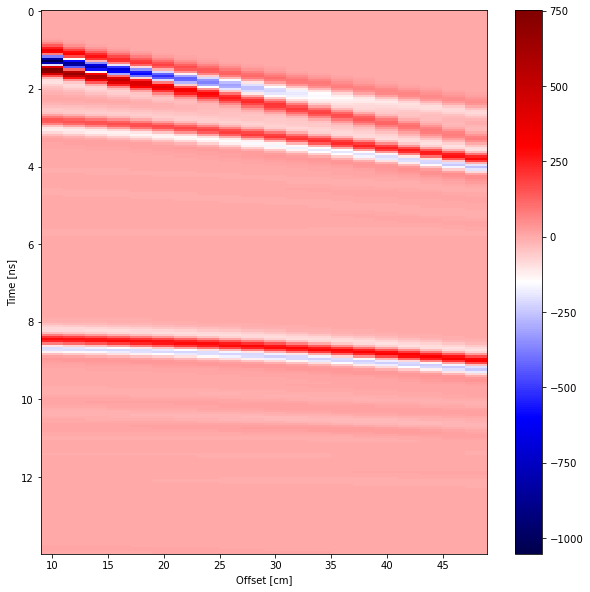

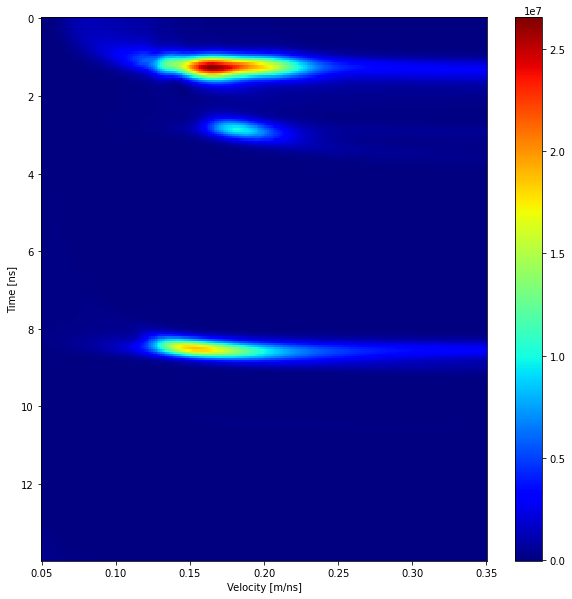

In [7]:
window_time = 14e-9
cmp, dt = get_output_data("antenna_offset_merged.out", 1, "Ez")
t = np.arange(0, window_time+dt/2, dt)
offset = np.linspace(0.10, 0.48, 20)

res_cmp, res_t = signal.resample(cmp, 250, t, axis=0)
res_cmp = np.swapaxes(res_cmp, 0, 1)
plot_cmp_profile(res_cmp, offset, res_t)

velocity = np.linspace(0.05e9, 0.35e9, num = 250)

cross_correlation = traces_coherency(np.real(res_cmp), offset, res_t, velocity)
est_permittivities, est_thicknesses = layer_parameter_estimation(np.real(res_cmp), offset, t, velocity, cross_correlation)

plot_velocity_spectrum(cross_correlation, velocity, res_t, [])

true_permittivities, true_thicknesses = np.array([2, 4.5]), np.array([0.2, 0.4])
print_estimation_results(true_permittivities, est_permittivities, true_thicknesses, est_thicknesses)
